# Project 5: Wrangle and Analyze Data



### Introduction

  This project focused on the process of wrangling data from the WeRateDogs Twitter account archive using Python library. 
  This Twitter account rates dogs with humorous comments. The rating is usually out of 10, and the ratings are usually greater than 10. I'm going to wrangle WeRateDogs account archive data to create great analyses and visualizations. WeRateDogs has over 8.6 million followers and has received international media coverage.

In this process I'm going to walk through the wrangling data process:
- Gather 
- Assess 
- Clean

In [1]:
#import the important libraries:

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import requests
import json
import os
import seaborn as sns
from IPython.display import Image 

## Part 1: Gathering Data

**a- The WeRateDogs twitter archive data** :"Existing file" the WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets stored in (twitter_archive_enhanced.csv).

In [2]:
#twitter archive Data:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', sep=',')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None



**b- The tweet image predictions data** "Downable file" Contain what breed of dog (or other objects, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library.

In [3]:
#Download and the tweet image predictions data :
Folder_name = 'image_predictions'
if not os.path.exists(Folder_name):
    os.makedirs(Folder_name)
  
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(os.path.join(Folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Ensure that the request is succeeded:
response

<Response [200]>

In [5]:
#Read image-predictions.tsv file as image_predictions_data :
image_predictions = pd.read_csv('image-predictions.tsv',sep ='\t')

In [6]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


**c- The twitter API data** "JSON API file" Each tweet's retweet count and favorite ("like") count at minimum, and any additional data I find interesting.

In [7]:
#Unfortunately twitter didn't give me the access to get the data as developer account so, instead I will use the tweet-json file that Udacity provided it
Tweet_json = pd.read_json('tweet-json.txt', orient = 'records', lines =True)

In [8]:
#read the json file 
Tweet_json.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Part 2 : Assessing Data

I'm going to Assess the data based on:
- **Quality**: issues with content, Low quality data is also known as dirty data.
- **Tidiness**: issues with structure that prevent easy analysis.

 ### 1) twitter_archive:

In [9]:
#Check the info:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# View descriptive statistics:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
#checek the NaN values:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
#checek the duplicated values:
twitter_archive.duplicated().sum()


0

In [13]:
#check the rating_numerator column, Almost always greater than 10. 11/10, 12/10, 13/10
twitter_archive['rating_numerator'].value_counts() 

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
#check the rating_denominator column, it is should be out of 10
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# Check name column values:
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Monkey       1
Torque       1
Trevith      1
Teddy        1
Glenn        1
Name: name, Length: 957, dtype: int64

In [16]:
# See the unique values:
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
# Collect the wrong/weird names in an array: 
weird_names = ['incredibly', 'one', 'quite','getting', 'actually','my', 'not', 'his', 'officially', 'this', 'all', 'old', 'just', 'unacceptable', 'an', 'light', 'space', 'O', 'None', 'such', 'the', 'infuriating', 'by', 'a', 'nan', 'very' ]

### Quality issues in twitter_archive:

- Timestamp column is of type object ,I will change it to **datetime** type to be more appropriate.

- tweet_id column is of type int it should be **String (object)** because I will not need to do any calculation or manipulation

- Replace None value to **nan** to be more clear. 

- name column has wrong names that start with lower case and none values replace them with **nan** value.

- Unnecessary html tags in source column,strip all html anchor tags (ex: <a..></a>) in source column,Then 
Convert the datatype from string to categorical..


### Tidiness issues in twitter_archive:


- In twitter_archive doggo, floofer, pupper, puppo columns merge them in one column called dog_stage.



 ### 2) image_predictions:

In [18]:
#Check the info:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# View descriptive statistics:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# Check the contents:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [21]:
#checek the duplicated values in jpg_url:
image_predictions["jpg_url"].duplicated().sum()


66

In [22]:
# Check where exactly the duplicate values in jpg url occurred:
image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg    2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg    2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg    2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg    2
                                                  ..
https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg    1
https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg    1
https://pbs.twimg.com/media/CaAhMb1XEAAB6Bz.jpg    1
https://pbs.twimg.com/media/CW7bkW6WQAAksgB.jpg    1
https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [23]:
# Checek the NaN values:  
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality issues in image_predictions:


- The "p1" and "p1_conf" columns will be renamed with more meaningful titles.


- Remove unnecessary columns:

   -The column "jpg_url" will be removed since url data is already   contained in the twitter archive data.

   -The "p2" and "p3" related columns will be removed as I am only using the most confident prediction ("p1").

   -After removal of "False" entries, the "p1_dog" column will be removed becouse it already did its purpose.

- tweet_id column is of type int  it should be string **(object)** type because I will not do any calculation or manipulation.

 ### 3) Tweet_json:


In [24]:
#Check the info:
Tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [25]:
# View descriptive statistics in favorite_count column:
Tweet_json.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [26]:
# View descriptive statistics in retweet_count column:
Tweet_json.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [27]:
# Check the contents:
Tweet_json.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [28]:
#checek the duplicated values in id:
Tweet_json["id"].duplicated().sum()

0

In [29]:
# Checek the NaN values:  
Tweet_json.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

### Quality cleaning in Tweet_json:
- First change the id name to "tweet_id" befor marge,and convert type to **String(object)**

### Tidiness issues :
- Merge all the dataset in one table.

## Part 3 : Cleaning Data

In [30]:
#Copy the data before  cleaning  them:
Twitter_archive_clean = twitter_archive.copy()
Image_predictions_clean = image_predictions.copy()
Tweet_json_clean = Tweet_json.copy()

### Quality cleaning in twitter_archive:

#### Define
Timestamp column is of type object ,I will change it to **datetime** type to be more appropriate.

#### Code

In [31]:
Twitter_archive_clean['timestamp'] = pd.to_datetime(Twitter_archive_clean['timestamp'])

#### Test

In [32]:
Twitter_archive_clean['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

#### Define
tweet_id column is of type int it should be **String (object)** because I will not need to do any calculation or manipulation

#### Code

In [33]:
Twitter_archive_clean['tweet_id'] = Twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [34]:
Twitter_archive_clean['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: object

#### Define
Replace None value to **nan** to be more clear

#### Code

In [35]:
Twitter_archive_clean.replace('None', np.nan, inplace=True)

#### Test

In [36]:
(Twitter_archive_clean.values=="NaN").sum()

0

In [37]:
Twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


#### Define
name column has wrong names that start with lower case and none values replace them with **nan** value.

#### Code

In [38]:
for weird in weird_names:     
    Twitter_archive_clean['name'].replace(weird, np.nan ,inplace = True)

#### Test

In [39]:
Twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

#### Define
Unnecessary html tags in source column,strip all html anchor tags (ex: <a..></a>) in source column,Then 
Convert the datatype from string to categorical..
#### Code

In [40]:
Twitter_archive_clean.source = Twitter_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
Twitter_archive_clean.source = Twitter_archive_clean.source.astype('category')

#### Test

In [41]:
Twitter_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Tidiness cleaning in twitter_archive:

#### Define


- In twitter_archive doggo, floofer, pupper, puppo columns merge them in one column called dog_stage

#### Code

In [42]:
Twitter_archive_clean['dog_stage'] = Twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').sum(axis=1).astype(str)
Twitter_archive_clean.loc[Twitter_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo , puppo'
Twitter_archive_clean.loc[Twitter_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo , floofer'
Twitter_archive_clean.loc[Twitter_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo , pupper'
Twitter_archive_clean = Twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'] , axis = 1)

#### Test

In [43]:
Twitter_archive_clean.dog_stage.value_counts()

                   1976
pupper              245
doggo                83
puppo                29
doggo , pupper       12
floofer               9
doggo , floofer       1
doggo , puppo         1
Name: dog_stage, dtype: int64

### Quality cleaning in image_predictions:


#### Define
The "p1" and "p1_conf" columns will be renamed with more meaningful titles.

#### Code

In [44]:
new_column_names = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}

Image_predictions_clean.rename(columns= new_column_names, inplace=True)

#### Test

In [45]:
Image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2075 non-null   int64  
 1   jpg_url                2075 non-null   object 
 2   img_num                2075 non-null   int64  
 3   dog_breed_prediction   2075 non-null   object 
 4   prediction_confidence  2075 non-null   float64
 5   p1_dog                 2075 non-null   bool   
 6   p2                     2075 non-null   object 
 7   p2_conf                2075 non-null   float64
 8   p2_dog                 2075 non-null   bool   
 9   p3                     2075 non-null   object 
 10  p3_conf                2075 non-null   float64
 11  p3_dog                 2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define 

- Remove unnecessary columns:

   -The column "jpg_url" will be removed since url data is already   contained in the twitter archive data.

   -The "p2" and "p3" related columns will be removed as I am only using the most confident prediction ("p1").

   -After removal of "False" entries, the "p1_dog" column will be removed becouse it already did its purpose.


#### Code

In [46]:
preds_drop_columns = ['jpg_url', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']

Image_predictions_clean.drop(preds_drop_columns, inplace=True, axis=1)

 #### Test

In [47]:
Image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2075 non-null   int64  
 1   img_num                2075 non-null   int64  
 2   dog_breed_prediction   2075 non-null   object 
 3   prediction_confidence  2075 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 65.0+ KB


#### Define 
- tweet_id column is of type int  it should be string **(object)** type because I will not do any calculation or manipulation.

#### Code

In [48]:
Image_predictions_clean["tweet_id"]=Image_predictions_clean['tweet_id'].astype(str)

#### Test

In [49]:
Image_predictions_clean["tweet_id"]

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

### Quality cleaning in Tweet_json:
- First change the id name to "tweet_id" befor marge,and convert type to **String(object)**

#### Code

In [50]:
#First change the id name to "tweet_id"
Tweet_json_clean.rename(index = str, columns = {"id" :"tweet_id"} , inplace = True )

In [51]:
#convert type to **String(object)**
Tweet_json_clean['tweet_id'] = Tweet_json_clean['tweet_id'].astype(str)

#### Test

In [52]:
Tweet_json_clean['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: object

### Tidiness issues :
- Merge all the dataset in one table.

#### Define
Merge all the dataset in one table

#### Code

In [53]:
merge_data = pd.merge(Twitter_archive_clean, Image_predictions_clean, how = 'inner', on = ['tweet_id'])
merge_data = pd.merge(merge_data, Tweet_json_clean, how = 'inner', on = ['tweet_id'])

#### Test

In [54]:
merge_data

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Storing:

In [55]:
merge_data.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [56]:
# Read the merge dataset:
twitter_dataset = pd.read_csv("twitter_archive_master.csv")

In [57]:
twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2073 non-null   int64  
 1   tweet_id                       2073 non-null   int64  
 2   in_reply_to_status_id_x        23 non-null     float64
 3   in_reply_to_user_id_x          23 non-null     float64
 4   timestamp                      2073 non-null   object 
 5   source_x                       2073 non-null   object 
 6   text                           2073 non-null   object 
 7   retweeted_status_id            79 non-null     float64
 8   retweeted_status_user_id       79 non-null     float64
 9   retweeted_status_timestamp     79 non-null     object 
 10  expanded_urls                  2073 non-null   object 
 11  rating_numerator               2073 non-null   int64  
 12  rating_denominator             2073 non-null   i

## Analysis:

In [58]:
twitter_dataset.dog_stage.value_counts()

pupper             210
doggo               67
puppo               23
doggo , pupper      11
floofer              7
doggo , floofer      1
doggo , puppo        1
Name: dog_stage, dtype: int64

####  visualization.

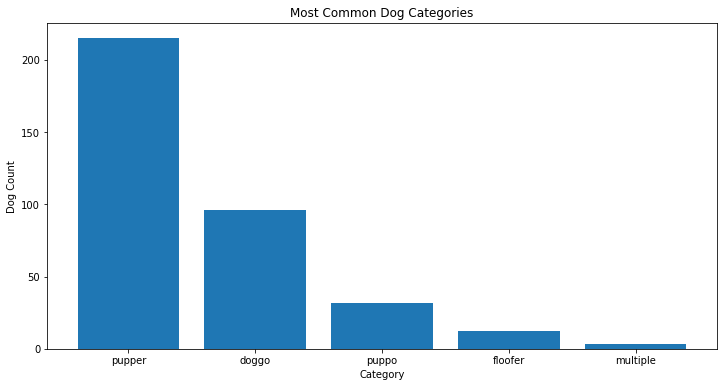

In [59]:
plt.rcParams["figure.figsize"] = [12, 9]
dog_type = ['pupper', 'doggo', 'puppo', 'floofer', 'multiple']
dog_counts = [215, 96, 32, 12, 3]
fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Categories")
plt.show()

In [60]:
twitter_dataset.rating_numerator.describe()

count    2073.000000
mean       12.265798
std        40.699924
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [65]:
twitter_dataset.dog_breed_prediction.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
                     ... 
cuirass                 1
restaurant              1
hare                    1
bookshop                1
grey_fox                1
Name: dog_breed_prediction, Length: 378, dtype: int64

In [62]:
twitter_dataset.retweet_count.describe()

count     2073.000000
mean      2976.089243
std       5054.897526
min         16.000000
25%        634.000000
50%       1408.000000
75%       3443.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [63]:
twitter_dataset.favorite_count.describe()

count      2073.000000
mean       8556.718283
std       12098.640994
min           0.000000
25%        1674.000000
50%        3864.000000
75%       10937.000000
max      132810.000000
Name: favorite_count, dtype: float64

### Insights

- The most popular dog type is a "pupper".
- The most popular dog based on image predictions is a Golden Retriever with 150.
- The median and mean ratings out of ten are 11 and 12.
- The median and mean retweet count are 1408 and 2976.
- The median and mean favorite count are 3864 and 8556.

####  visualization.
##### Correlation between the data

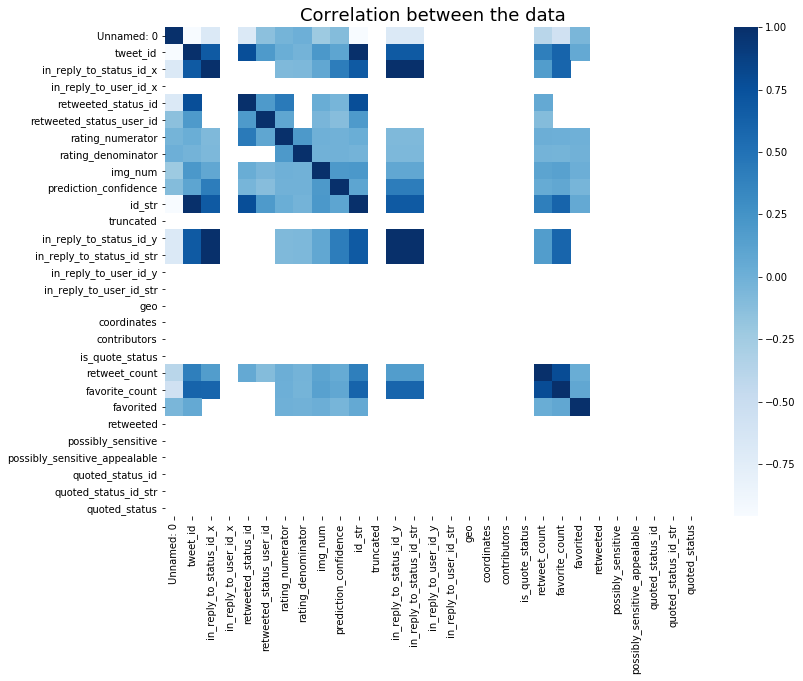

In [67]:
sns.heatmap(twitter_dataset.corr(), cmap="Blues")
plt.title('Correlation between the data', size=18);